In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
#Loading Data
train=pd.read_csv("train.csv")
train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [169]:
#oading test data
test=pd.read_csv("test.csv")
test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [4]:
#checking dtypes and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
DateTime    48120 non-null object
Junction    48120 non-null int64
Vehicles    48120 non-null int64
ID          48120 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [3]:
#There are total 4 different Junctions
train.Junction.value_counts()

3    14592
2    14592
1    14592
4     4344
Name: Junction, dtype: int64

In [67]:
#Converting to datetime format
train.DateTime=train.DateTime.map(pd.to_datetime)

In [170]:
test.DateTime=test.DateTime.map(pd.to_datetime)

In [68]:
train.DateTime[0]

Timestamp('2015-11-01 00:00:00')

In [69]:
#Adding new feature day_name,it will tell the name of day

train["day_name"]=train["DateTime"].apply(lambda x:x.day_name())

In [171]:
test["day_name"]=test["DateTime"].apply(lambda x:x.day_name())

In [70]:
#Adding new feature month_name , it will tell the name of month

train["month_name"]=train["DateTime"].apply(lambda x:x.month_name())

In [172]:
test["month_name"]=test["DateTime"].apply(lambda x:x.month_name())

In [71]:
#Adding new feature day , it will tell the day of month

train["day"]=train["DateTime"].apply(lambda x:x.day)

In [173]:
test["day"]=test["DateTime"].apply(lambda x:x.day)

In [72]:
#Adding new feature month , it will tell the month of year

train["month"]=train["DateTime"].apply(lambda x:x.month)

In [174]:
test["month"]=test["DateTime"].apply(lambda x:x.month)

In [73]:
#Adding new feature weekday , it will tell the day of week

train["weekday"]=train["DateTime"].apply(lambda x:x.weekday())

In [175]:
test["weekday"]=test["DateTime"].apply(lambda x:x.weekday())

In [74]:
#Adding new feature hour , it will tell the hour of day

train["hour"]=train["DateTime"].apply(lambda x:x.hour)

In [176]:
test["hour"]=test["DateTime"].apply(lambda x:x.hour)

In [137]:
#Adding new feature year , it will tell the year 

train["year"]=train["DateTime"].apply(lambda x:x.year)

In [189]:
test["year"]=test["DateTime"].apply(lambda x:x.year)

In [138]:
train.head()

,DateTime,Junction,Vehicles,ID,day_name,month_name,day,month,weekday,hour,Is_month_start,Is_month_end,Is_weekend,year
0,2015-11-01 00:00:00,1,15,20151101001,Sunday,November,1,11,6,0,True,False,1,2015
1,2015-11-01 01:00:00,1,13,20151101011,Sunday,November,1,11,6,1,True,False,1,2015
2,2015-11-01 02:00:00,1,10,20151101021,Sunday,November,1,11,6,2,True,False,1,2015
3,2015-11-01 03:00:00,1,7,20151101031,Sunday,November,1,11,6,3,True,False,1,2015
4,2015-11-01 04:00:00,1,9,20151101041,Sunday,November,1,11,6,4,True,False,1,2015


In [190]:
test.head()

,DateTime,Junction,ID,day_name,month_name,day,month,weekday,hour,Is_weekend,year
0,2017-07-01 00:00:00,1,20170701001,Saturday,July,1,7,5,0,1,2017
1,2017-07-01 01:00:00,1,20170701011,Saturday,July,1,7,5,1,1,2017
2,2017-07-01 02:00:00,1,20170701021,Saturday,July,1,7,5,2,1,2017
3,2017-07-01 03:00:00,1,20170701031,Saturday,July,1,7,5,3,1,2017
4,2017-07-01 04:00:00,1,20170701041,Saturday,July,1,7,5,4,1,2017


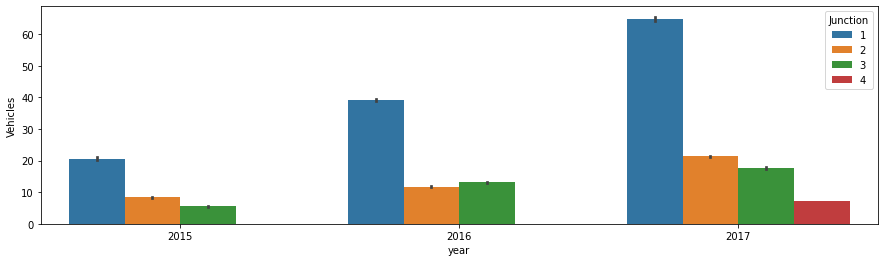

In [139]:
plt.figure(figsize = (15,4))
sns.barplot(y="Vehicles", x="year",
             hue="Junction", 
             data=train)

**Important takeaways**

1. The 4th Junction is constructed in year 2017
2. The no. of vehicles has increased on all junctions across the years but the increase on the 1st junction is very high which means that growth in  infrastructure has taken place the infra. might be residential or offices which has attracted more people they might bes residents or office employees

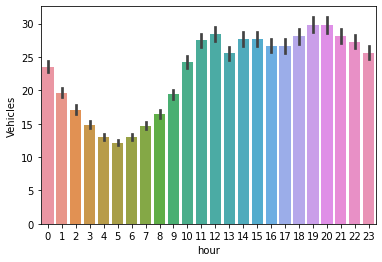

In [28]:
sns.barplot(y="Vehicles", x="hour",
              
             data=train)

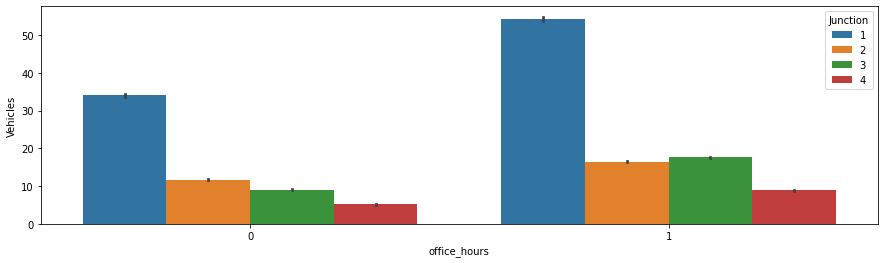

In [235]:
plt.figure(figsize = (15,4))
sns.barplot(y="Vehicles", x="office_hours",
             hue="Junction", 
             data=train)

**Important takeaways**

1. The number of vehicles on Junction 1 is almost double at the office hours as compared to non-office hours
2. on the other hand the number of vehicles is more or less same at office hours and non office hours 
3. Which means that the Junction 1 might be having lots of offices due to which the increase in no. of vehicles is almost double and other junction might be residential areas and due to which there is no significant growth in no. of vehicles even during office hours

We can clearly see that the number of vehicles increase significantly during the office hours

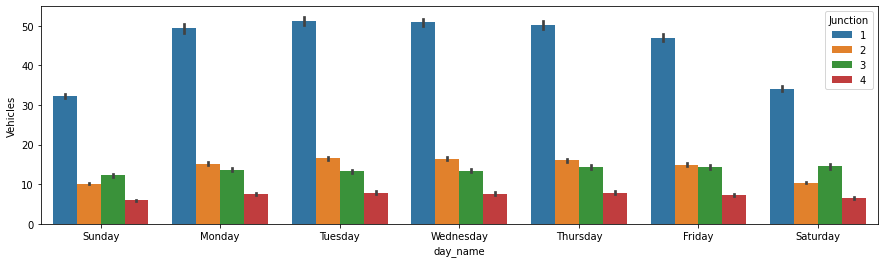

In [266]:
plt.figure(figsize = (15,4))
sns.barplot(y="Vehicles", x="day_name",
             hue="Junction", 
             data=train)

We can cleary see that the number of vehicles at Junction 1 is lower on weekends but is almost same on other three junctions which means that the junctions 2,3&4 are residential areas and the vehicles there are stationary/parked.

In [77]:
#Adding new feature is_month_start , it will tell the is it the start of the month

train["Is_month_start"]=train.DateTime.apply(lambda x:x.is_month_start)

In [78]:
#Adding new feature is_month_end , it will tell the is it the end of the month

train["Is_month_end"]=train.DateTime.apply(lambda x:x.is_month_end)

In [ ]:
#Adding new feature is_weekend , it will tell the is it the end of the week i.e Saturday/Sunday

train["Is_weekend"]=[1 if x==5 else 0 for x in train['weekday']]

In [179]:
test["Is_weekend"]=[1 if x==5 else 0 for x in test['weekday']]

In [124]:
train.loc[(train["weekday"]==6),"Is_weekend" ]=1

In [180]:
test.loc[(test["weekday"]==6),"Is_weekend" ]=1

In [206]:
train.head()

,DateTime,Junction,Vehicles,ID,day_name,month_name,day,month,weekday,hour,Is_month_start,Is_month_end,Is_weekend,year
0,2015-11-01 00:00:00,1,15,20151101001,Sunday,November,1,11,6,0,True,False,1,2015
1,2015-11-01 01:00:00,1,13,20151101011,Sunday,November,1,11,6,1,True,False,1,2015
2,2015-11-01 02:00:00,1,10,20151101021,Sunday,November,1,11,6,2,True,False,1,2015
3,2015-11-01 03:00:00,1,7,20151101031,Sunday,November,1,11,6,3,True,False,1,2015
4,2015-11-01 04:00:00,1,9,20151101041,Sunday,November,1,11,6,4,True,False,1,2015


In [231]:
#Adding new feature office_hours , it will tell the is it the office hours

train["office_hours"]=[1 if x> 10 else 0 for x in train['hour']]

In [232]:
train.loc[(train["hour"]==23),"office_hours" ]=1

In [260]:
test["office_hours"]=[1 if x> 10 else 0 for x in test['hour']]

In [261]:
test.loc[(test["hour"]==23),"office_hours" ]=1

In [262]:
test.office_hours.value_counts()

1    6396
0    5412
Name: office_hours, dtype: int64

In [125]:
train.Is_weekend.value_counts()

0    34440
1    13680
Name: Is_weekend, dtype: int64

In [181]:
test.Is_weekend.value_counts()

0    8352
1    3456
Name: Is_weekend, dtype: int64

In [183]:
test.head()

,DateTime,Junction,ID,day_name,month_name,day,month,weekday,hour,year,Is_weekend
0,2017-07-01 00:00:00,1,20170701001,Saturday,July,1,7,5,0,2017,1
1,2017-07-01 01:00:00,1,20170701011,Saturday,July,1,7,5,1,2017,1
2,2017-07-01 02:00:00,1,20170701021,Saturday,July,1,7,5,2,2017,1
3,2017-07-01 03:00:00,1,20170701031,Saturday,July,1,7,5,3,2017,1
4,2017-07-01 04:00:00,1,20170701041,Saturday,July,1,7,5,4,2017,1


In [236]:
train_df=train.drop(["day_name","month_name","ID","Is_month_start","Is_month_end","DateTime"],axis=1)

In [263]:
test_df=test.drop(["day_name","month_name","ID","DateTime"],axis=1)

In [237]:
train_df.corr()

,Junction,Vehicles,day,month,weekday,hour,Is_weekend,year,office_hours
Junction,1.000000e+00,-0.613787,-2.094621e-03,-1.242771e-01,-6.590970e-04,3.309106e-20,-1.043690e-03,2.212977e-01,-2.695132e-17
Vehicles,-6.137872e-01,1.000000,2.789498e-02,-2.272345e-02,-1.260265e-01,2.199377e-01,-1.505503e-01,2.212531e-01,2.527551e-01
day,-2.094621e-03,0.027895,1.000000e+00,9.154760e-03,-8.628855e-04,-5.148322e-18,2.841485e-03,-7.474779e-03,3.099658e-17
month,-1.242771e-01,-0.022723,9.154760e-03,1.000000e+00,-3.208219e-03,-4.780388e-20,-5.589111e-03,-6.234957e-01,1.319770e-17
weekday,-6.590970e-04,-0.126027,-8.628855e-04,-3.208219e-03,1.000000e+00,3.999663e-20,7.901746e-01,1.278526e-03,-5.348237e-19
hour,3.309106e-20,0.219938,-5.148322e-18,-4.780388e-20,3.999663e-20,1.000000e+00,-2.955645e-20,0.000000e+00,8.637633e-01
Is_weekend,-1.043690e-03,-0.150550,2.841485e-03,-5.589111e-03,7.901746e-01,-2.955645e-20,1.000000e+00,-1.436664e-03,4.648205e-17
year,2.212977e-01,0.221253,-7.474779e-03,-6.234957e-01,1.278526e-03,0.000000e+00,-1.436664e-03,1.000000e+00,-9.311550e-17
office_hours,-2.695132e-17,0.252755,3.099658e-17,1.319770e-17,-5.348237e-19,8.637633e-01,4.648205e-17,-9.311550e-17,1.000000e+00


In [254]:
X=train_df.drop(["Vehicles"],axis=1)
y=train_df["Vehicles"]

In [150]:
#Importing Some more libraries

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [255]:
#train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [152]:
import xgboost
regressor=xgboost.XGBRegressor()


In [158]:
#Defining hyperparameters

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [246]:
#Randomized search CV

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_squared_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=0)



In [247]:
#Fitting the data to Randomized search cv

random_cv.fit(X_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 73.2min finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [256]:
#Applying best parameters

regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=1,  monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [257]:
#Fitting the data to xgboost


regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [258]:
#predicting

pred=regressor.predict(X_test)


In [259]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 3.8924960932502635


In [ ]:
#Further steps are for result submission of hackathon

In [264]:
pred1=regressor.predict(test_df)

pred=pd.DataFrame(pred1)

sm=pd.read_csv("submit.csv")

submit=pd.concat([sm.ID,pred],axis=1)

submit.columns=["ID","Vehicles"]

submit.Vehicles

0        60.737900
1        56.033981
2        49.956371
3        39.050148
4        31.596642
           ...    
11803     9.184540
11804    12.561023
11805    12.447151
11806    18.547388
11807    10.302295
Name: Vehicles, Length: 11808, dtype: float32

In [265]:
submit.to_csv("Submission1.csv",index=False)